In [11]:
from anaysis import analysis, add_to_usage, print_analysis, get_over_leaf_format, analysis_v2
import sys
from matplotlib import pyplot as plt
import numpy as np
import json

def add_to_usage(usage_summary:dict, total_cost=0, total_prompt_tokens=0, total_completion_tokens=0):
    model = list(usage_summary.keys())[-1]
    total_prompt_tokens += usage_summary[model]['prompt_tokens']
    total_completion_tokens += usage_summary[model]['completion_tokens']
    return total_cost, total_prompt_tokens, total_completion_tokens    

def get_avg_accuracy_and_cost(log_path, file_folder, model_name, version="v1", round_cut=-1):
    d = 1_000_000  # price is per 1M tokens
    prices = {
        "gpt-4o": (2.5 / d, 10 / d),
        "gpt-4o-mini": (0.15 / d, 0.6 / d),
        "o1-mini": (1.1 / d, 4.4 / d),
        "o1": (15 / d, 7.5 / d),
        "o3-mini": (1.1 / d, 4.4 / d),
        "deepseek-r1": (0.55 / d, 0.27 / d),
        "phi-4": (0.07/ d, 0.14/ d),
        "gpt-4.1": (2/ d, 8 / d),
        "gpt-4.1-mini": (0.4/ d, 1.6 / d),
        "gpt-4.1-nano": (0.1/d , 0.4 / d),
        "llama-4-mav": (0.17 / d, 0.6 / d),
        "llama-4-scout": (0.17 / d, 0.6 / d),
        "o4-mini": (1.1 / d, 4.4 / d),
        "gemini": (0.15 / d, 0.6 / d),
        "qwen-3-32b": (0.1 / d, 0.3 / d),
    }

    prompt_price, completion_price = prices[model_name]
    file_template = f"{log_path}/{file_folder}" + "/agent_incident_{0}.json"

    total_count = 0
    total_reward = 0
    total_prompt_tokens = 0
    total_completion_tokens = 0

    incidents = [5, 34, 38, 39, 55, 134, 166, 322]
    for i in incidents:
        with open(file_template.format(i), "r") as f:
            data = json.load(f)

        if version == "v2":
            result = analysis_v2(data, round_cut=round_cut)
        else:
            result = analysis(data, round_cut=round_cut)

        total_count += result['total_len']
        total_reward += result['total_reward']
        total_prompt_tokens += result['total_prompt_tokens']
        total_completion_tokens += result['total_completion_tokens']

    avg_accuracy = round(total_reward / total_count, 3)
    avg_cost = round(
        (total_prompt_tokens * prompt_price + total_completion_tokens * completion_price)
        / total_count,
        5,
    )

    return avg_accuracy, avg_cost

In [12]:
baselines = {
  "gpt-4o-mini": "BaselineAgent_4o-mini_c71_alert_level_t0_s25_trial1",
  "gpt-4o": "BaselineAgent_gpt-4o_c70_alert_level_t0_s25_trial1",
  "o1-mini": ("BaselineAgent_o1-mini_c92_alert_level_t0_s25_trial1", "v2"),
  "o3-mini": ("BaselineAgent_o3-mini_c99_alert_level_t0_s25_trial1", "v2"),
  "phi-4": ("BaselineAgent_phi4_c469_alert_level_t0_s25_trial1", "v2"),
#   "deepseek-r1": ("BaselineAgent_r1_c468_alert_level_t0_s25_trial1", "v2"),
  "gpt-4.1": ("BaselineAgent_gpt-4.1_c1001_alert_level_t0_s25_trial1", "v2"),
  "gpt-4.1-mini": ("BaselineAgent_gpt-4.1-mini_c2001_alert_level_t0_s25_trial1", "v2"),
  "gpt-4.1-nano": ("BaselineAgent_gpt-4.1-nano_c3002_alert_level_t0_s25_trial1", "v2"),
  "llama-4-mav": ("BaselineAgent_llama4-Mav-17b_c7003_alert_level_t0_s25_trial1", "v2"),
  "llama-4-scout": ("BaselineAgent_llama4-Scout-17b_c7005_alert_level_t0_s25_trial1", "v2"),
  "o4-mini": ("BaselineAgent_o4-mini_c4003_alert_level_t0_s25_trial1", "v2"),
  "gemini": ("BaselineAgent_gemini-2.5-flash_c6000_alert_level_t0_s25_trial1", "v2"),
  "qwen-3-32b": ("BaselineAgent_qwen3-32b_c8200_alert_level_t0_s25_trial1", "v2"),

}


log_path = "../secgym/final_results"
results = {}

for name, b in baselines.items():
    if isinstance(b, tuple):
        file_folder, version = b
    else:
        file_folder = b
        version = "v1"

    avg_accuracy, avg_cost = get_avg_accuracy_and_cost(log_path, file_folder, name, version)
    results[name] = {
        "accuracy": avg_accuracy,
        "cost": avg_cost
    }

for k, v in results.items():
    print(f"{k}: accuracy = {v['accuracy']}, cost = {v['cost']}")

Error calculating usage: usage summary None
Error calculating usage: usage summary {}
gpt-4o-mini: accuracy = 0.192, cost = 0.00922
gpt-4o: accuracy = 0.293, cost = 0.23517
o1-mini: accuracy = 0.222, cost = 0.22425
o3-mini: accuracy = 0.296, cost = 0.1136
phi-4: accuracy = 0.085, cost = 0.00746
gpt-4.1: accuracy = 0.338, cost = 0.09329
gpt-4.1-mini: accuracy = 0.271, cost = 0.02172
gpt-4.1-nano: accuracy = 0.136, cost = 0.00391
llama-4-mav: accuracy = 0.29, cost = 0.00926
llama-4-scout: accuracy = 0.262, cost = 0.02216
o4-mini: accuracy = 0.368, cost = 0.10552
gemini: accuracy = 0.305, cost = 0.0143
qwen-3-32b: accuracy = 0.182, cost = 0.00634


In [13]:
results['gemini-2.5-flash'] = results.pop('gemini')

/var/folders/tp/0zjfmsnd7p139lz0c65_db940000gn/T/ipykernel_84712/944772887.py:58: UserWarning: 
The palette list has fewer values (10) than needed (13) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(
/var/folders/tp/0zjfmsnd7p139lz0c65_db940000gn/T/ipykernel_84712/944772887.py:58: UserWarning: 
The markers list has fewer values (9) than needed (13) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(


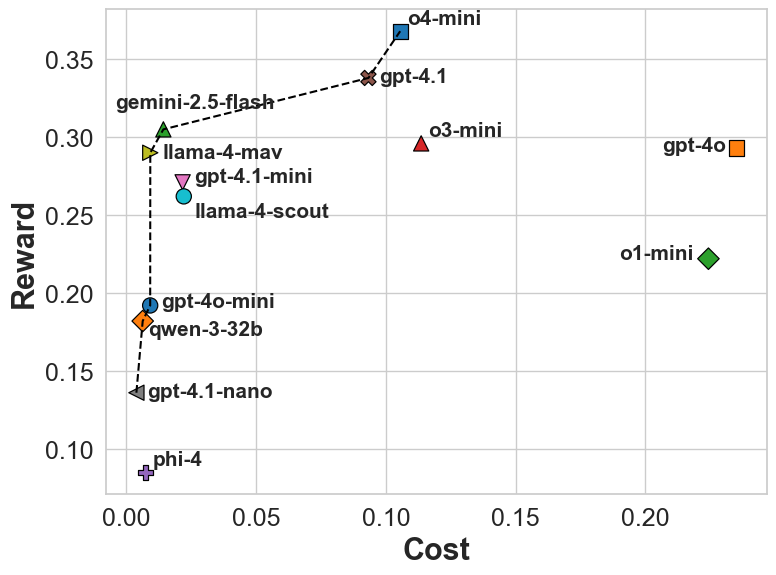

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Shared color palette and styling
GLOBAL_FONT_SCALE = 1.2
GLOBAL_FONT_SIZE = 18
LINE_WIDTH = 2
MARKER_SIZE = 6
LEGEND_FONT_SIZE = 16
ANNOTATION_FONT_SIZE = 12
PLOT_PALETTE = sns.color_palette("tab10")  # Consistent palette

def plot_turns_vs_reward(model_rewards: dict, steps: list, output_filename: str):
    """
    Plots the relation between the number of interaction turns and rewards for different models.
    """
    sns.set(style="whitegrid", font_scale=GLOBAL_FONT_SCALE)
    plt.figure(figsize=(7, 5))

    markers = ['o', 's', 'D', '^', 'v', '*', 'P', 'X']
    linestyles = ['-', '--', '-.', ':']
    colors = PLOT_PALETTE

    for i, (model, rewards) in enumerate(model_rewards.items()):
        plt.plot(
            steps,
            rewards,
            marker=markers[i % len(markers)],
            linestyle=linestyles[i % len(linestyles)],
            color=colors[i % len(colors)],
            linewidth=LINE_WIDTH,
            markersize=MARKER_SIZE,
            label=model
        )

    plt.xlabel("Number of Interaction Turns", fontsize=GLOBAL_FONT_SIZE)
    plt.ylabel("Reward", fontsize=GLOBAL_FONT_SIZE)
    plt.xticks(steps, fontsize=GLOBAL_FONT_SIZE)
    plt.yticks(fontsize=GLOBAL_FONT_SIZE)
    plt.legend(fontsize=LEGEND_FONT_SIZE, loc="best", frameon=True)
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.savefig(output_filename, format="pdf", bbox_inches="tight")
    plt.show()

def plot_cost_vs_accuracy_seaborn(results, save_path=None):
    """
    Seaborn-style plot of cost vs accuracy with Pareto front and consistent styling.
    """
    df = pd.DataFrame([
        {"Model": k, "Accuracy": v["accuracy"], "Cost": v["cost"]}
        for k, v in results.items()
    ])

    sns.set(style="whitegrid", font_scale=GLOBAL_FONT_SCALE)
    plt.figure(figsize=(8, 6))
    ax = sns.scatterplot(
        data=df,
        x="Cost", y="Accuracy",
        hue="Model", style="Model",
        palette=PLOT_PALETTE[:len(df)],
        markers=['o', 's', 'D', '^', 'P', 'X', 'v', '<', '>'][:len(df)],
        s=120, edgecolor="black",
        legend=False  # Remove the legend
    )

    offset_map = {
        "gpt-4o-mini": (8, -1),
        "deepseek-r1": (6, -10),
        "phi4": (6, 8),
        # "o3-mini": (6, 6),
        "gpt-4o": (-54, -2),
        "o1-mini": (-64, 0),
        "gemini-2.5-flash": (-35, 15),
        "llama-4-mav": (9, -4),
        "llama-4-scout": (8, -15),
        "gpt-4.1-mini": (8, 0),
        "gpt-4.1-nano": (8, -3),
        "gpt-4.1": (8, -3),
        "qwen-3-32b": (4, -10),
    }
    for i, row in df.iterrows():
        dx, dy = offset_map.get(row["Model"], (5, 5))
        ax.annotate(
            row["Model"],
            (row["Cost"], row["Accuracy"]),
            textcoords="offset points",
            xytext=(dx, dy),
            fontsize=ANNOTATION_FONT_SIZE+3,
            weight="bold"
        )
        # Calculate and plot Pareto front
    filtered = df.sort_values(by=["Cost", "Accuracy"])
    pareto_front = [filtered.iloc[0]] if not filtered.empty else []
    for _, row in filtered.iterrows():
        if row["Accuracy"] > pareto_front[-1]["Accuracy"]:
            pareto_front.append(row)
    if len(pareto_front) > 1:
        pareto_df = pd.DataFrame(pareto_front)
        plt.plot(pareto_df["Cost"], pareto_df["Accuracy"], linestyle='--', color='black')

    plt.xlabel("Cost", fontsize=GLOBAL_FONT_SIZE+4, weight="bold")
    plt.ylabel("Reward", fontsize=GLOBAL_FONT_SIZE+4, weight="bold")
    plt.xticks(fontsize=GLOBAL_FONT_SIZE)
    plt.yticks(fontsize=GLOBAL_FONT_SIZE)

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.show()

plot_cost_vs_accuracy_seaborn(results, save_path="plots/cost_vs_accuracy.pdf")